## Uppgift 0 - Uppvärmning

Börja med att göra explorativ dataanalys över hela datasettet. Generella frågor att besvara med hjälp av datan: 
   
  a. hur många länder som är med i datan?  
  b. vilka länder är med? (förkortningarna räcker)  
  c. vilka sporter är med?  
  d. vilka medaljtyper finns det?  
  e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse,  
  f. utforska datan vidare med egna frågor  
  
Se även till att plotta några intressanta features, exempelvis:  

  g. diagram över könsfördelningen  
  h. diagram över topp 10 länder som tagit flest medaljer  
  i. plotta gärna fler saker som är intressant.  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# from helpers import hdisplay

In [3]:
athlete_events = pd.read_csv("../Projekt-OS-Italien/Data/athlete_events.csv")
noc_regions = pd.read_csv("../Projekt-OS-Italien/Data/noc_regions.csv")

In [4]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [7]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# a. hur många länder som är med i datan? 

number_countries = noc_regions["region"].nunique()

print(f"There is a total of {number_countries} countries.")

There is a total of 206 countries.


In [9]:
# b. vilka länder är med? (förkortningarna räcker)

noc_regions["region"].unique()


array(['Afghanistan', 'Curacao', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua', 'Australia', 'Argentina', 'Armenia', 'Aruba',
       'American Samoa', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Barbados', 'Burundi', 'Belgium', 'Benin', 'Bermuda', 'Bhutan',
       'Bosnia and Herzegovina', 'Belize', 'Belarus', 'Czech Republic',
       'Boliva', 'Botswana', 'Brazil', 'Bahrain', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Central African Republic', 'Cambodia', 'Canada',
       'Cayman Islands', 'Republic of Congo', 'Chad', 'Chile', 'China',
       'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo',
       'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica',
       'Croatia', 'Greece', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'Eritrea',
       'El Salvador', 'Spain', 'Estonia', 'Ethiopia', 'Russia', 'Fiji',
       'Finland', 'France', 'Germany', 'Micronesia', 'Gabon', 'Gambi

In [10]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
# c. vilka sporter är med?

athlete_events["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [12]:
# d. vilka medaljtyper finns det?  

athlete_events["Medal"].dropna().unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In [13]:
# e. ta reda på statistik för åldern: medelvärde, median, min, max, standardavvikelse

athlete_events['Age'].agg(["mean", "median", "min", "max", "std"])

mean      25.556898
median    24.000000
min       10.000000
max       97.000000
std        6.393561
Name: Age, dtype: float64

In [14]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
noc_regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


We want to discover which cities have hosted the most Olympic Games

In [16]:
# f. utforska datan vidare med egna frågor  

all_cities = athlete_events["City"].unique()

# Top Olympics hosting cities
cities = athlete_events.groupby("City")["Games"].nunique().sort_values(ascending=False).head(10)
cities

City
Athina            3
London            3
Sankt Moritz      2
Paris             2
Stockholm         2
Los Angeles       2
Lake Placid       2
Innsbruck         2
Albertville       1
Rio de Janeiro    1
Name: Games, dtype: int64

The cities that has hosted the most Olympic Games are Athens and London.

In [17]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Now we want to discover the most successful countries in summer and winter games respectively.

In [18]:
# f. utforska datan vidare med egna frågor

summer_olympics = athlete_events.query("Season == 'Summer'").dropna()
winter_olympics = athlete_events.query("Season == 'Winter'").dropna()

teams_summer = summer_olympics.groupby("Team")["Medal"].value_counts().sort_values(ascending=False)

#.head(10)
#cities = athlete_events.groupby("City")["Games"].nunique().sort_values(ascending=False).head(10)

# fig = px.bar(summer_olympics,
#              x="Team", barmode = 'group',   
# )

# fig.show()

In [19]:
teams_winter = winter_olympics.groupby("Team")["Medal"].value_counts().sort_values(ascending=False)
teams_winter

Team           Medal 
Canada         Gold      237
United States  Silver    228
Finland        Bronze    210
Soviet Union   Gold      205
Canada         Silver    174
                        ... 
Spain          Gold        1
Bulgaria       Gold        1
Ukraine        Silver      1
Croatia        Bronze      1
Yugoslavia     Bronze      1
Name: count, Length: 180, dtype: int64

In [20]:
teams_winter = winter_olympics.groupby("Team")["Medal"].count().sort_values(ascending=False)
teams_winter

Team
Canada           495
United States    458
Finland          412
Sweden           339
Soviet Union     339
                ... 
Luxembourg         2
China-3            2
Uzbekistan         1
Belgium            1
New Zealand        1
Name: Medal, Length: 74, dtype: int64

We have discovered that the United States is the most successful during summer and that Canada is the most successful during winter.

In [21]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


([<matplotlib.patches.Wedge at 0x12cfb4d9590>,
 [Text(-0.7147310163003325, 0.8361576252945936, 'M'),
  Text(0.7147309380136029, -0.8361576922125369, 'F')],
 [Text(-0.38985328161836313, 0.4560859774334146, '73%'),
  Text(0.38985323891651064, -0.45608601393411097, '27%')])

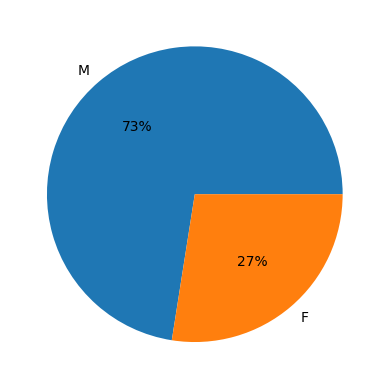

In [22]:
# g. diagram över könsfördelningen  
values = athlete_events['Sex'].value_counts()
plt.pie(values, labels = values.index, autopct = "%0.0f%%")

In [23]:
# h. diagram över topp 10 länder som tagit flest medaljer 

teams = athlete_events.groupby("Team")["Medal"].count().sort_values(ascending=False)
top10 = teams.head(10)
bottom = teams.tail(150)
display(top10)

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64

In [24]:
bottom

Team
Nokaut II    0
Nora         0
Noreg        0
Norman-1     0
Nortazo      0
            ..
Ireland-1    0
Israel-1     0
Israel-2     0
Italy-3      0
rn-2         0
Name: Medal, Length: 150, dtype: int64

In [25]:
px.bar(top10, x="Medal", 
       template="simple_white", 
       title = "Top 10 Countries", 
       labels={"Medal": "Number of medals", "Team": "Country"})

In [26]:
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [27]:
# i. plotta gärna fler saker som är intressant

In [28]:
# Import population by country data

url = 'https://www.worldometers.info/world-population/population-by-country/'
tables = pd.read_html(url)
df = tables[0]
print(df.head(5))

   # Country (or dependency)  Population  (2023) Yearly  Change  Net  Change  \
0  1                   India          1428627663         0.81 %     11454490   
1  2                   China          1425671352        -0.02 %      -215985   
2  3           United States           339996563         0.50 %      1706706   
3  4               Indonesia           277534122         0.74 %      2032783   
4  5                Pakistan           240485658         1.98 %      4660796   

   Density  (P/Km²)  Land Area  (Km²)  Migrants  (net)  Fert.  Rate  \
0               481           2973190          -486136          2.0   
1               152           9388211          -310220          1.2   
2                37           9147420           999700          1.7   
3               153           1811570           -49997          2.1   
4               312            770880          -165988          3.3   

   Med.  Age Urban  Pop % World  Share  
0       28.0         36 %      17.76 %  
1       39

In [29]:
# merge the dataframes by country. only include the population from df. drop missing

merged_df = pd.merge(athlete_events, noc_regions, on='NOC', how='left')
merged_df = pd.merge(merged_df, df[['Country (or dependency)', 'Population  (2023)']], left_on='region', right_on='Country (or dependency)', how='left')
merged_df.dropna(subset=['Population  (2023)'], inplace=True)
merged_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Country (or dependency),Population (2023)
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,China,1.425671e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,China,1.425671e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,Denmark,5.910913e+06
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,Denmark,5.910913e+06
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,Netherlands,1.761830e+07


Now we want to discover and visualize the "golden age" for Olympic results, i.e. what is the most common age of the sportsmen winning Gold.

In [30]:
golden_age = athlete_events.query("Medal == 'Gold'")
golden_age.sample()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
55144,28277,Manuel Dionisio Daz Martnez,M,30.0,NaN,NaN,Cuba,CUB,1904 Summer,1904,Summer,St. Louis,Fencing,"Fencing Men's Foil, Team",Gold


In [31]:
px.scatter(golden_age, x = 'Sport', y = 'Age', color = 'Sex', symbol = 'Season', hover_name = 'Age', hover_data = ['Team', 'Name'])

It looks like the age depends on the sports and there is no bad age for Olympics. But let's count the overall number of medals for each age.

In [32]:
age_counted = golden_age['Age'].value_counts()
age_counted.sample(6)

Age
60.0      4
28.0    802
45.0     20
43.0     32
33.0    292
59.0      2
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x12c8394e910>,
 [Text(5, 0, '18.0'),
  Text(10, 0, '23.0'),
  Text(15, 0, '28.0'),
  Text(20, 0, '33.0'),
  Text(25, 0, '38.0'),
  Text(30, 0, '43.0'),
  Text(35, 0, '48.0'),
  Text(40, 0, '53.0'),
  Text(45, 0, '58.0')])

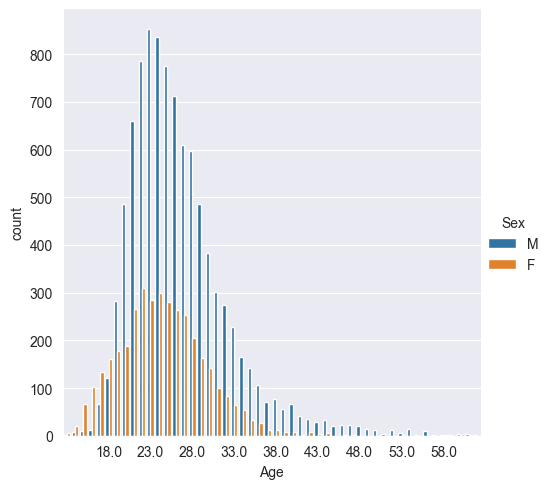

In [33]:
sns.set_style('darkgrid')
sns.catplot(x='Age', kind = 'count', hue = 'Sex', data = golden_age)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])

The trend is pretty similar for men and women, but let's use plotly to see the exact data.

In [34]:
px.bar(age_counted, title = "Age frequency for golden medalists")

The conclusion is pretty visible: the golden Olympic age is 23-24.